In [ ]:
import os
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

### Pour les cubes

In [15]:
def convert_to_yolo_format(x, y, w, h, image_width, image_height):
    """
    Convertit les coordonnées de la boîte englobante au format YOLO.
    (x, y) est le coin supérieur gauche de la boîte englobante.
    (w, h) sont la largeur et la hauteur de la boîte.
    """
    x_center = (x + w / 2) / image_width
    y_center = (y + h / 2) / image_height
    width = w / image_width
    height = h / image_height
    return x_center, y_center, width, height

# Fonction pour trouver le prochain indice disponible pour les fichiers de sortie
def find_next_index(folder, prefix, suffix):
    max_index = -1
    for filename in os.listdir(folder):
        if filename.startswith(prefix) and filename.endswith(suffix):
            # Extrait le numéro de l'indice du nom de fichier
            index_part = filename[len(prefix):-len(suffix)]
            if index_part.isdigit():
                max_index = max(max_index, int(index_part))
    return max_index + 1

# Chemins des dossiers
background_path = './background/background_1.png'
cubic_folder = './cubic'
output_img_folder = './img_patch'
output_txt_folder = './txt'

# Charger l'image de l'arrière-plan
background = Image.open(background_path)
bg_width, bg_height = background.size

# Déterminer les indices de départ pour les images et les annotations
start_index = find_next_index(output_img_folder, 'cubic_', '.png')

# Liste des fichiers dans le dossier "cubic"
cubic_files = [f for f in os.listdir(cubic_folder) if os.path.isfile(os.path.join(cubic_folder, f)) and f.endswith('.png')]

for idx, cubic_file in enumerate(cubic_files, start=start_index):
    # Chemin de l'image de l'objet
    object_path = os.path.join(cubic_folder, cubic_file)
    
    # Charger l'image de l'objet
    object_img = Image.open(object_path)
    
    # Rotation aléatoire
    angle = random.uniform(0, 360)  # Angle de rotation aléatoire entre 0 et 360 degrés
    object_img = object_img.rotate(angle, expand=True)
    
    # Redimensionnement aléatoire
    scale = random.uniform(0.7, 1.5)  # Échelle aléatoire entre 0.7x et 1.5x
    new_width = int(object_img.width * scale)
    new_height = int(object_img.height * scale)
    object_img = object_img.resize((new_width, new_height))
    
    # Générer une position aléatoire (x, y)
    max_x = max(bg_width - new_width, 0)
    max_y = max(bg_height - new_height, 0)
    x_offset = random.randint(0, max_x) if max_x else 0
    y_offset = random.randint(0, max_y) if max_y else 0

    # Recréer l'arrière-plan pour chaque collage
    current_background = background.copy()
    
    # Coller l'image de l'objet sur l'arrière-plan à la position aléatoire
    current_background.paste(object_img, (x_offset, y_offset), object_img if object_img.mode == 'RGBA' else None)

    # Nom de base avec l'index
    base_name = f"cubic_{idx}"
    
    # Enregistrer l'image résultante
    output_image_path = os.path.join(output_img_folder, f"{base_name}.png")
    current_background.save(output_image_path)
    
    # Calculer et enregistrer les coordonnées YOLO
    x_center, y_center, width, height = convert_to_yolo_format(x_offset, y_offset, new_width, new_height, bg_width, bg_height)
    label_path = os.path.join(output_txt_folder, f"{base_name}.txt")
    with open(label_path, 'w') as file:
        file.write(f"0 {x_center} {y_center} {width} {height}\n")

    print(f"L'image a été enregistrée sous : {output_image_path}")
    print(f"Les annotations YOLO ont été enregistrées sous : {label_path}")


L'image a été enregistrée sous : D:/Travail/Cours/M1/s2/Projet Innov/docs/data_augment/img_patch\cubic_48.png
Les annotations YOLO ont été enregistrées sous : D:/Travail/Cours/M1/s2/Projet Innov/docs/data_augment/txt\cubic_48.txt
L'image a été enregistrée sous : D:/Travail/Cours/M1/s2/Projet Innov/docs/data_augment/img_patch\cubic_49.png
Les annotations YOLO ont été enregistrées sous : D:/Travail/Cours/M1/s2/Projet Innov/docs/data_augment/txt\cubic_49.txt
L'image a été enregistrée sous : D:/Travail/Cours/M1/s2/Projet Innov/docs/data_augment/img_patch\cubic_50.png
Les annotations YOLO ont été enregistrées sous : D:/Travail/Cours/M1/s2/Projet Innov/docs/data_augment/txt\cubic_50.txt
L'image a été enregistrée sous : D:/Travail/Cours/M1/s2/Projet Innov/docs/data_augment/img_patch\cubic_51.png
Les annotations YOLO ont été enregistrées sous : D:/Travail/Cours/M1/s2/Projet Innov/docs/data_augment/txt\cubic_51.txt
L'image a été enregistrée sous : D:/Travail/Cours/M1/s2/Projet Innov/docs/data_a

## VISU 

Vérifier que l'annotation correspond bien à notre image

In [1]:
import os
from PIL import Image, ImageDraw

def draw_yolo_annotations(image_path, label_path):
    """
    Charge une image et son fichier d'annotation YOLO, puis affiche l'image avec un rectangle correspondant à l'annotation.
    """
    # Charger l'image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Taille de l'image
    img_width, img_height = image.size

    # Lire le fichier d'annotations YOLO
    with open(label_path, 'r') as file:
        for line in file:
            # Parser les données YOLO
            _, x_center, y_center, width, height = map(float, line.split())
            
            # Convertir les coordonnées YOLO en coordonnées de rectangle (x_min, y_min, x_max, y_max)
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = (x_center + width / 2) * img_width
            y_max = (y_center + height / 2) * img_height
            
            # Dessiner le rectangle sur l'image
            draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=2)

    # Afficher l'image avec les annotations
    image.show()

# Chemins des fichiers
image_path = 'D:\\Travail\\Cours\\M1\\s2\\Projet Innov\\docs\\data_augment\\img_patch_ball\\ball_50.png'
label_path = 'D:\\Travail\\Cours\\M1\\s2\\Projet Innov\\docs\\data_augment\\txt_ball\\ball_50.txt'

# Exécuter la fonction pour dessiner les annotations
draw_yolo_annotations(image_path, label_path)


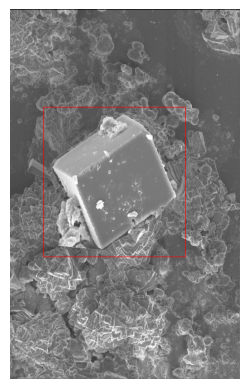

In [6]:
def draw_yolo_annotations(image_path, label_path):
    """
    Charge une image et son fichier d'annotation YOLO, puis affiche l'image avec un rectangle correspondant à l'annotation.
    """
    # Charger l'image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Taille de l'image
    img_width, img_height = image.size

    # Lire le fichier d'annotations YOLO
    with open(label_path, 'r') as file:
        for line in file:
            # Parser les données YOLO
            _, x_center, y_center, width, height = map(float, line.split())
            
            # Convertir les coordonnées YOLO en coordonnées de rectangle (x_min, y_min, x_max, y_max)
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = (x_center + width / 2) * img_width
            y_max = (y_center + height / 2) * img_height
            
            # Dessiner le rectangle sur l'image
            draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=2)

    # Afficher l'image avec les annotations dans le notebook
    plt.imshow(image)
    plt.axis('off')  # Ne pas afficher les axes
    plt.show()

# Chemins des fichiers
image_path = 'D:\\Travail\\Cours\\M1\\s2\\Projet Innov\\docs\\data_augment\\img_patch\\cubic_1.png'
label_path = 'D:\\Travail\\Cours\\M1\\s2\\Projet Innov\\docs\\data_augment\\txt\\cubic_1.txt'

# Exécuter la fonction pour dessiner les annotations
draw_yolo_annotations(image_path, label_path)
